<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:**
    - A neuron can be thought of as a function. It takes multiple inputs in, multiples them by weights, sums them, adds a bias, applies an "activation function", and returns that activated value.
- **Input Layer:**
    - An input layer is the first layer of a neural network. It what takes in the data.
- **Hidden Layer:**
    - Hidden layers are the layers in the middle of a network. They are "hidden" because we don't really ever see them or directly interact with them, and by the time the data has gotten there, it's been changed so much it's almost unrecognizable.
- **Output Layer:**
    - The output layer is the final layer. It is what returns that actual predictions.
- **Activation:**
    - In the context of of neural networks, a node's activation function is what determines how valuable that node is. It does this by taking the weighted sum of that node (inputs * weights + bias) and applies some usually non linear function to that value. For instance with the sigmoid function, it "squishify's" that value around 0.5. So as the returned value approaches negative infinity, the sigmoid value approaches 0, and as it approaches positive infinity, it approaches 1.
- **Backpropagation:**
    - Backpropagation is the idea of updating all the weights and biases for every layer based on how well or poorly that given layers nodes performed on the output, determined by some cost function.


## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [1]:
import pandas as pd
candy = pd.read_csv('chocolate_gummy_bears.csv')

In [2]:
print(candy.shape)
candy.head()

(10000, 3)


,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. You will not be able to achieve more than ~50% with the simple perceptron. Explain why you could not achieve a higher accuracy with the *simple perceptron* architecture, because it's possible to achieve ~95% accuracy on this dataset. Provide your answer in markdown (and *optional* data anlysis code) after your perceptron implementation. 

In [3]:
# Start your candy perceptron here

X = candy[['chocolate', 'gummy']].values
y = candy['ate'].values.reshape(-1, 1)

In [4]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, niter = 10):
        np.random.seed(42)
        self.niter = niter
        
    def __sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(x)
        return sx / (1 - sx)
    
    def __add_ones(self, X):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        return X

    def fit(self, X, y):
        X_ones = self.__add_ones(X)
        self.weights = np.random.random((X_ones.shape[1], 1))
        
        for i in range(self.niter):
            weighted_sum = np.dot(X_ones, self.weights)

            activated_output = self.__sigmoid(weighted_sum)
            
            activated_derivative = self.__sigmoid_derivative(weighted_sum)

            error = y - activated_output
            error_squared = error ** 2
            print("error", np.mean(error_squared))

            self.weights += np.dot(X_ones.T, error*activated_derivative)

    
    def predict(self, X):
        X_ones = self.__add_ones(X)
        pred = np.dot(X_ones, self.weights)
        return (pred <= 0.5).astype(int)

In [5]:
perc = Perceptron(niter=10)
perc.fit(X, y)

error 0.31216790443391745
error 0.5
error 0.5
error 0.5
error 0.5
error 0.5
error 0.5
error 0.5
error 0.5
error 0.5


/Users/spentaur/.local/share/virtualenvs/lambda-e5gwxZ0x/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [6]:
perc.weights

array([[-15274.22939304],
       [-14784.6007116 ],
       [-14786.23971837]])

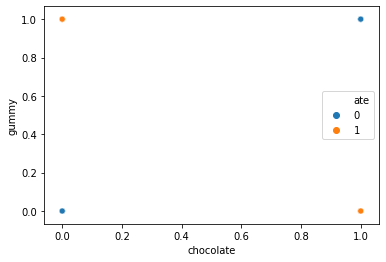

In [10]:
import seaborn as sns
ax = sns.scatterplot(x="chocolate", y="gummy", data=candy, hue="ate", alpha = 0.5)

A single layer perceptron can't fit non linear data, it's essentially logistic regression at this point. As you can see by the graph, there's no possible line that doesn't inlcude both ate 0 and ate 1, meaning the best accuracy is 50%.

### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [11]:
np.array([
    [1,3],
    [2,3]
]).size

4

In [12]:
from scipy import optimize
from sklearn.metrics import log_loss

# https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795
    
class RelU:
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        return np.maximum(0,input)

    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad 

class Layer:
    def __init__(self, input_nodes, output_nodes, learning_rate, activation_function = 'relu'):
        self.input_nodes = input_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate
        self.weights = np.random.rand(
            self.input_nodes,
            self.output_nodes
        ) * 0.01
        self.bias = np.random.rand(
            self.output_nodes
        ) * 0.01

        
    def forward(self, inputs):
        # TODO dot or matmul?
        return np.matmul(inputs, self.weights) + self.bias
    
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output,np.transpose(self.weights))

        # compute gradient w.r.t. weights and biases
        grad_weights = np.transpose(np.dot(np.transpose(grad_output),input))
        grad_biases = np.sum(grad_output, axis = 0)
        
        # Here we perform a stochastic gradient descent step. 
        # Later on, you can try replacing that with something better.
        self.weights = self.weights - self.learning_rate * grad_weights
        self.bias = self.bias - self.learning_rate * grad_biases
        return grad_input
        
    
class NeuralNetwork:
    # TODO better variable names
    def __init__(self, layers, learning_rate = 0.1, epochs = 100):
        self.learning_rate = 0.1
        self.epochs = epochs
        self.layers = []
        for layer in layers:
            self.layers.append(
                layer
            )
         
    def forward(self, inputs):
        activations = []
        input = inputs
        
        for layer in self.layers:
            active = layer.forward(input)
            activations.append(active)
            input = active
            
        assert len(activations) == len(self.layers)
            
        return activations
            
    def cost_function(self, logits, reference_answers):
        """Compute crossentropy from logits[batch,n_classes] and ids of correct answers"""
        logits_for_answers = logits[:,reference_answers]

        xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
        
        return xentropy

    def grad_cost_function(self, logits, reference_answers):
        """Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers"""
        ones_for_answers = np.zeros_like(logits)
        ones_for_answers[:, reference_answers] = 1
    
    
        softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

        return (- ones_for_answers + softmax) / logits.shape[0]
    
    
    def train(self, inputs, outputs):
        """
        Train your network on a given batch of X and y.
        You first need to run forward to get all layer activations.
        Then you can run layer.backward going from last to first layer.
        After you called backward for all layers, all Dense layers have already made one gradient step.
        """

        # Get the layer activations
        layer_activations = self.forward(inputs)
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = self.cost_function(logits,outputs)
        loss_grad = self.grad_cost_function(logits,outputs)

        for idx, layer in enumerate(reversed(self.layers)):
            loss_grad = layer.backward(layer_activations[len(self.layers) - idx - 2], loss_grad)
    
    def iterate_minibatches(self, inputs, targets, batchsize, shuffle=False):
        assert len(inputs) == len(targets)
        if shuffle:
            indices = np.random.permutation(len(inputs))
        for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
            if shuffle:
                excerpt = indices[start_idx:start_idx + batchsize]
            else:
                excerpt = slice(start_idx, start_idx + batchsize)
            yield inputs[excerpt], targets[excerpt]
    
    def fit(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs.reshape(-1)
        for epoch in range(self.epochs):
            for x_batch,y_batch in self.iterate_minibatches(self.inputs,self.outputs,batchsize=32,shuffle=True):
                self.train(x_batch,y_batch)
                
            y_pred = (self.forward(self.inputs))[-1].argmax(axis=-1)
            print(np.mean(y_pred == self.outputs))
    
    

In [13]:
layers = [
    Layer(X.shape[1], 3, learning_rate = 0.1),
    RelU(),
    Layer(3,5, learning_rate = 0.1),
    RelU(),
    Layer(5,2, learning_rate = 0.1)
]

nn = NeuralNetwork(layers)

In [14]:
nn.fit(X, y)

/Users/spentaur/.local/share/virtualenvs/lambda-e5gwxZ0x/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in exp
/Users/spentaur/.local/share/virtualenvs/lambda-e5gwxZ0x/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: overflow encountered in exp
/Users/spentaur/.local/share/virtualenvs/lambda-e5gwxZ0x/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in true_divide
/Users/spentaur/.local/share/virtualenvs/lambda-e5gwxZ0x/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


In [15]:
# Couldn't get this, I don't understand the math...

P.S. Don't try candy gummy bears. They're disgusting. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [49]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.shape)
X.head()

(303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

In [54]:
scaler = StandardScaler()

In [55]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
inputs = X_train.shape[1]
epochs = 75
batch_size = 10

In [58]:
model = Sequential()

In [73]:
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [74]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(x_train, y_train, 
          validation_data=(x_test,y_test), 
          epochs=epochs, 
          batch_size=batch_size
         )

Train on 242 samples, validate on 61 samples
Epoch 1/75
242/242 [==============================] - 1s 3ms/sample - loss: 0.2275 - acc: 0.9711 - val_loss: 2.9663 - val_acc: 0.7213
Epoch 2/75
242/242 [==============================] - 0s 446us/sample - loss: 0.1912 - acc: 0.9876 - val_loss: 4.0887 - val_acc: 0.6885
Epoch 3/75
242/242 [==============================] - 0s 586us/sample - loss: 0.1909 - acc: 0.9876 - val_loss: 4.1069 - val_acc: 0.6885
Epoch 4/75
242/242 [==============================] - 0s 969us/sample - loss: 0.1908 - acc: 0.9876 - val_loss: 3.8874 - val_acc: 0.7049
Epoch 5/75
242/242 [==============================] - 0s 732us/sample - loss: 0.1916 - acc: 0.9876 - val_loss: 4.3526 - val_acc: 0.6721
Epoch 6/75
242/242 [==============================] - 0s 1ms/sample - loss: 0.1916 - acc: 0.9876 - val_loss: 4.1139 - val_acc: 0.6885
Epoch 7/75
242/242 [==============================] - 0s 394us/sample - loss: 0.1908 - acc: 0.9876 - val_loss: 3.8914 - val_acc: 0.7049
Epoch 8

In [86]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [87]:
def create_model():
    model = Sequential()
    model.add(Dense(25, activation='relu', input_shape=(inputs,)))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [88]:
model = KerasClassifier(build_fn=create_model, verbose=5)

In [89]:
param_grid = {
    'batch_size': list(range(15, 106, 15)),
    'epochs': list(range(10, 101, 10)),
}

In [91]:
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5, 
    verbose=10,
    n_jobs=-1
)
grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [92]:
grid_result.best_score_

0.8471074375239286